<a href="https://colab.research.google.com/github/smilesrgouveia/Aula/blob/main/TarefaTrilha1_PL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://gutenberg.org/cache/epub/50950/pg50950.txt'): 
    texto.append(line.decode('utf-8'))

# Limpa texto
for i in range(len(texto)):
    texto[i] = texto[i].lower() 
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    #texto[i] = texto[i].replace('\','')
    texto[i] = texto[i].replace('!','') 
    texto[i] = texto[i].replace('_','')  
    texto[i] = texto[i].replace('+','') 
    texto[i] = texto[i].replace('*','')

In [ ]:
dicionario = {}                            

for linha in texto:
  
  linha = linha.lower()                 
  palavras = linha.split()                

  for palavra in palavras:                     
    if palavra not in dicionario.keys():          
      dicionario[palavra] = 1                   
    else:                                
      dicionario[palavra] =  dicionario[palavra] + 1   


print(list(dicionario.items())[:100])  

[('\ufeffthe', 1), ('project', 88), ('gutenberg', 25), ('ebook', 12), ('of', 1465), ('state', 41), ('the', 2587), ('union', 30), ('addresses', 9), ('barack', 18), ('obama', 19), ('by', 234), ('this', 485), ('is', 507), ('for', 568), ('use', 40), ('anyone', 14), ('anywhere', 5), ('in', 928), ('united', 64), ('states', 86), ('and', 1920), ('most', 74), ('other', 72), ('parts', 15), ('world', 106), ('at', 157), ('no', 136), ('cost', 27), ('with', 367), ('almost', 15), ('restrictions', 4), ('whatsoever', 2), ('you', 293), ('may', 48), ('copy', 12), ('it', 409), ('give', 69), ('away', 33), ('or', 314), ('re-use', 2), ('under', 21), ('terms', 21), ('license', 15), ('included', 4), ('online', 10), ('wwwgutenbergorg', 5), ('if', 158), ('are', 338), ('not', 278), ('located', 8), ("you'll", 8), ('have', 346), ('to', 1913), ('check', 6), ('laws', 24), ('country', 116), ('where', 88), ('before', 50), ('using', 10), ('title:', 2), ('2009-2016', 1), ('author:', 1), ('release', 2), ('date:', 1), ('ja

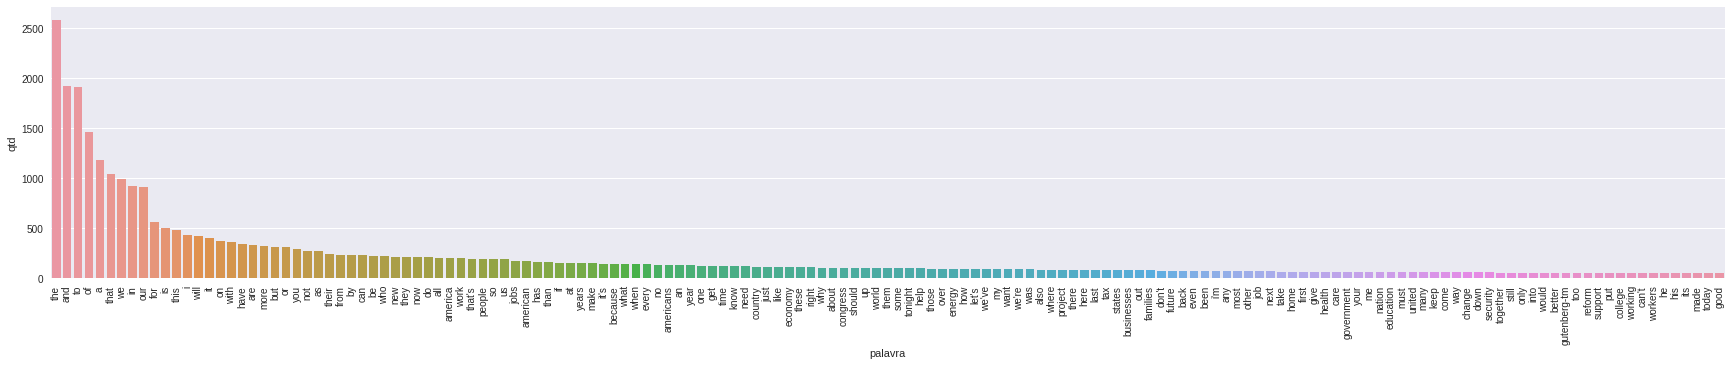

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(dicionario.items(),  columns=['palavra', 'qtd']).sort_values('qtd',ascending=False)
df = df[df['qtd'] >50] # somente termos com mais de 10 ocorrências
#df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(30,5))
mpl.style.use(['seaborn'])
sns.barplot(x=df.palavra,y=df['qtd'])
plt.xticks(rotation=90) 

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


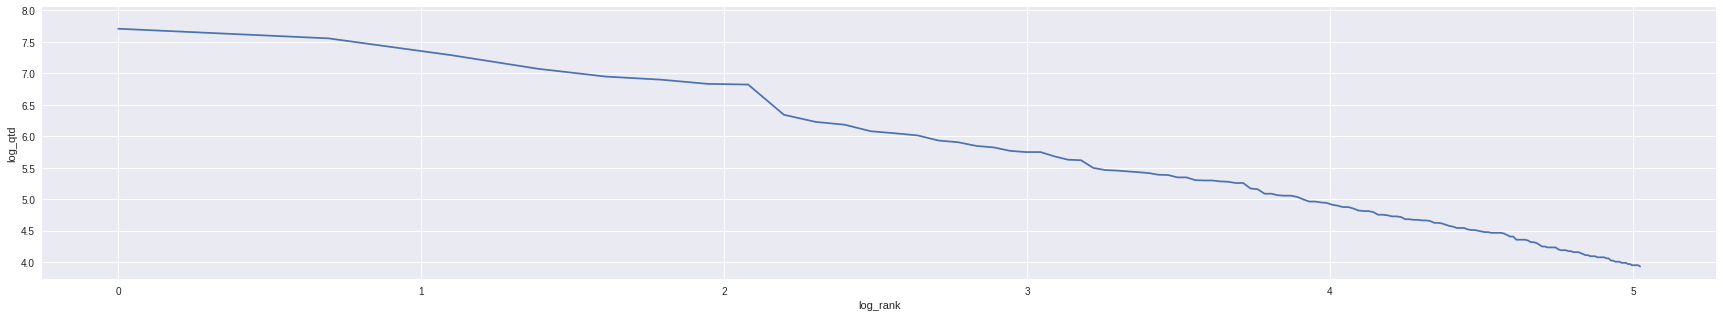

In [ ]:
import numpy as np

df = df.sort_values('qtd',ascending=False).reset_index(drop=True)

df['qtd'].replace(-np.Inf,0)

df['log_qtd'] = np.log(df['qtd'])
df['log_rank'] = np.log(df.index)
df['log_rank'].replace(-np.Inf,0,inplace=True)


plt.figure(figsize=(30,5))
sns.lineplot(x=df['log_rank'],y=df['log_qtd'])

plt.show()

### LINK GitHub: https://github.com/smilesrgouveia/Aula/blob/main/TarefaTrilha1_PL.ipynb